In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv("Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
q2=round(np.percentile(visa_df['prevailing_wage'],50),2)
q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=(q3-q1)
UB=q3+1.5*IQR
LB=q1-1.5*IQR
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
outliers=visa_df['prevailing_wage'][con1|con2]
outliers_data=outliers.values

In [7]:
#Case 2: Impute with Median
# We got pre_wage has 427 outliers
# we replace those 427 with median value of pre_wage

new_values=[]
for i in visa_df['prevailing_wage']:
    #print(i)
    if i>UB or i<LB:
        #print(i)
        median_value=round(visa_df['prevailing_wage'].median(),2)
        new_values.append(median_value)
    else:
        new_values.append(i)
len(new_values)


25480

$np.where$

In [9]:
dict1={'col1':[1,2,3,4],
      'col2':['A','B','C','D']}
data=pd.DataFrame(dict1)
data

,col1,col2
0,1,A
1,2,B
2,3,C
3,4,D


In [10]:
# I want to impute with a value 100 in the col1
# which are having values >2
# col1  col2
# 1     A
# 2     B
# 100   C
# 100   D

In [12]:
value=data['col1']
con=data['col1']>2
np.where(con,100,value)

array([  1,   2, 100, 100], dtype=int64)

In [21]:
#Case 1: create a new column
data['col3']=np.where(con,100,value)
data

,col1,col2,col3
0,1,A,1
1,2,B,2
2,100,C,100
3,100,D,100


In [22]:
#Case 2: update/override the old column
data['col12']=np.where(con,100,value)
data

,col1,col2,col3,col12
0,1,A,1,1
1,2,B,2,2
2,100,C,100,100
3,100,D,100,100


In [23]:
data.drop(['col3','col12'],axis=1,inplace=True)
data

,col1,col2
0,1,A
1,2,B
2,100,C
3,100,D


In [40]:
visa_df['prevailing_wage']
con = (visa_df['prevailing_wage']>UB) or (visa_df['prevailing_wage']<LB)
con

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

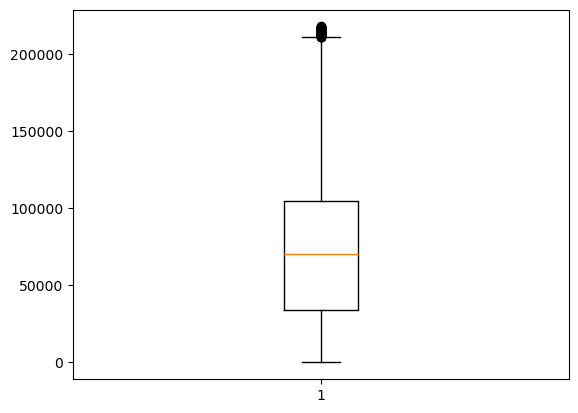

In [36]:
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
con=con1|con2
wage_median=round(visa_df['prevailing_wage'].median(),2)
visa_df['prevailing_wage']=np.where(con,wage_median,visa_df['prevailing_wage'])
visa_df['prevailing_wage']
plt.boxplot(visa_df['prevailing_wage'])
plt.show()